In [ ]:
################################ NN without any resampling techniques ################################

In [1]:
#### Uploading the dataset and make some changes ####

In [1]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')


In [2]:
# Show how to dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [3]:
#Drop the ID column, since it has no value to the models that need to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [4]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [6]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())

Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [7]:
from collections import Counter

# First we will see how the classes are divided.
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))


Original dataset shape Counter({0: 23364, 1: 6636})


In [8]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_cols, target_col, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_valid.shape)
print(y_train.shape)
print(y_test.shape)

(18000, 23)
(6000, 23)
(6000, 23)
(6000,)
(18000,)
(6000,)


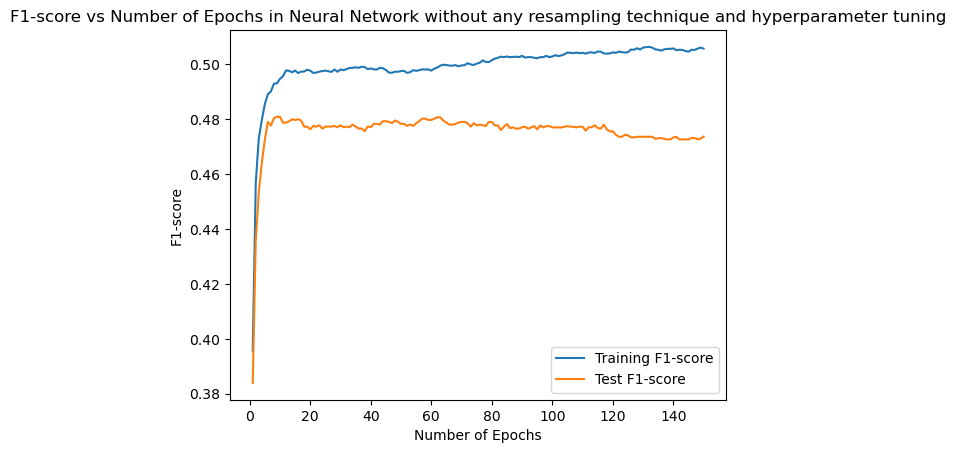

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np

# Create MLPClassifier instance
mlp = MLPClassifier(random_state= 42, max_iter=150)

# Lists to store training and test F1-scores
train_f1_scores = []
test_f1_scores = []

# Training loop
for epoch in range(150):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Predict on train and test data
    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)
    
    # Calculate F1-score for train and test sets
    train_f1 = f1_score(y_train, train_pred)
    test_f1 = f1_score(y_test, test_pred)
    
    # Append F1-scores to the lists
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plot F1-scores
plt.plot(range(1, 151), train_f1_scores, label='Training F1-score')
plt.plot(range(1, 151), test_f1_scores, label='Test F1-score')
plt.xlabel('Number of Epochs')
plt.ylabel('F1-score')
plt.title('F1-score vs Number of Epochs in Neural Network without any resampling technique and hyperparameter tuning')
plt.legend()
plt.show()


In [19]:
from keras import models
from keras import layers
### PUT YOUR CODE HERE ###
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the Keras model (already compiled)
model = build_model()
# Train the model (in silent mode -> verbose=0)
print('Training...')
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=150, batch_size=32, verbose=0)
print('Training done.')
### END ###

Training...
Training done.


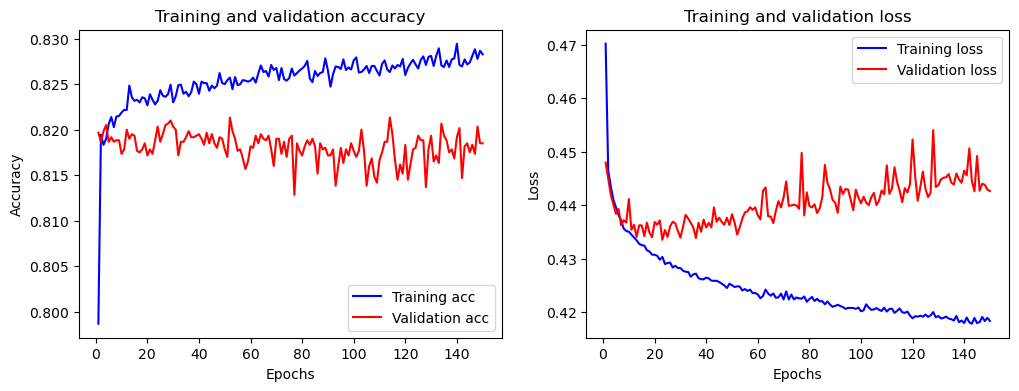

In [12]:
import matplotlib.pyplot as plt

# Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plotting the training history
plot_history(history)


In [13]:
from keras.layers import Dropout

def build_model_with_dropout():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the Keras model with dropout
model_with_dropout = build_model_with_dropout()

# Train the model (in silent mode -> verbose=0)
print('Training...')
history_with_dropout = model_with_dropout.fit(X_train, y_train,
                                              validation_data=(X_valid, y_valid),
                                              epochs=150, 
                                              batch_size=32, 
                                              verbose=0)
print('Training done.')


Training...
Training done.


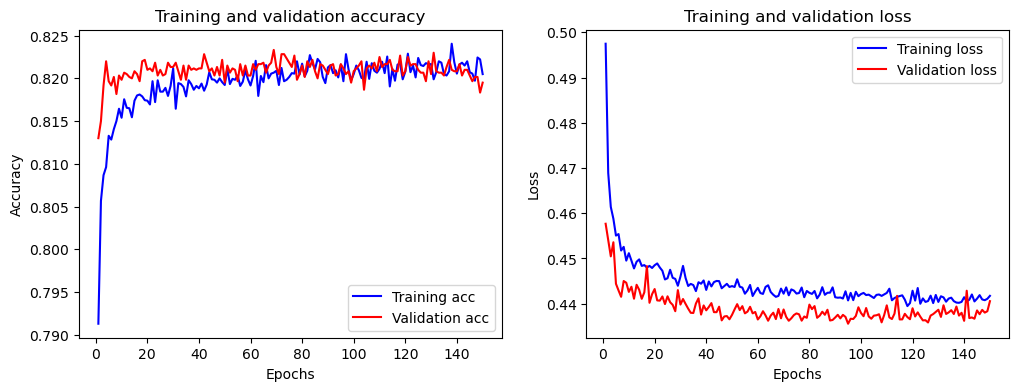

In [14]:
# Plotting the training history for the model with dropout
plot_history(history_with_dropout)


In [ ]:
################################ Using grid search ################################

In [10]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)

# define the model
model = MLPClassifier(random_state=42, max_iter=1000)  # Example: Increase max_iter to 1000

# define search space
space = dict()
#space['hidden_layer_sizes'] = [(100,), (50, 50), (30, 30, 30)]
space['activation'] = ['relu']
space['solver'] = ['sgd']
space['batch_size'] = [16]  # Options for batch size
space['learning_rate'] = ['adaptive']  # Options for learning rate
space['momentum'] = [0.5]  # Options for momentum

# define search
search = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner, refit=True)

# fit the grid search to the data
search.fit(input_cols, target_col)

# Access the best hyperparameters
best_params = search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model found by the grid search
best_model = search.best_estimator_

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels = cross_val_predict(best_model, input_cols, target_col, cv=cv_outer, n_jobs=-1)

# Generate the classification report
report = classification_report(target_col, predicted_labels, digits=4)
print(report)


Best hyperparameters: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 'adaptive', 'momentum': 0.5, 'solver': 'sgd'}
              precision    recall  f1-score   support

           0     0.8419    0.9471    0.8914     23364
           1     0.6674    0.3740    0.4794      6636

    accuracy                         0.8203     30000
   macro avg     0.7547    0.6605    0.6854     30000
weighted avg     0.8033    0.8203    0.8003     30000



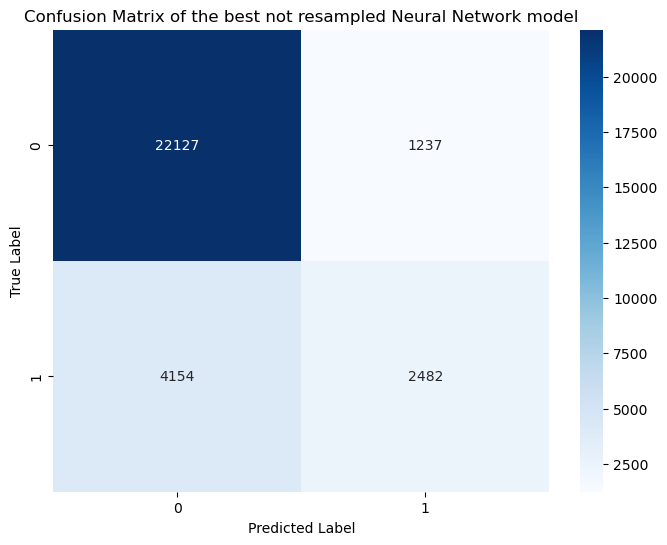

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best not resampled Neural Network model")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col, predicted_labels)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")

In [14]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score


# configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)

# define the model
model = MLPClassifier(random_state=42, max_iter=1000)  # Example: Increase max_iter to 1000

# define search space
space = dict()
#space['hidden_layer_sizes'] = [(100,), (50, 50), (30, 30, 30)]
space['activation'] = ['relu']
space['solver'] = ['sgd', 'adam', 'adamax']
space['batch_size'] = [16, 32, 64]  # Options for batch size
space['learning_rate'] = ['constant', 'adaptive', 'invscaling']  # Options for learning rate
space['momentum'] = [0.0, 0.5, 0.9]  # Options for momentum

# define search
search = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner, refit=True)

# fit the grid search to the data
search.fit(input_cols, target_col)

# Access the best hyperparameters
best_params = search.best_params_
print("Best hyperparameters:", best_params)

# Use the best model found by the grid search
best_model = search.best_estimator_

# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels = cross_val_predict(best_model, input_cols, target_col, cv=cv_outer, n_jobs=-1)

# Generate the classification report
report = classification_report(target_col, predicted_labels, digits=4)
print(report)

# Store f1 scores of outer CV
import numpy as np

# Execute the outer cross-validation loop to get f1 scores
f1_scores_outer_cv = []
for train_index, test_index in cv_outer.split(input_cols):
    X_train, X_test = input_cols.values[train_index], input_cols.values[test_index]
    y_train, y_test = target_col.values[train_index], target_col.values[test_index]
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    f1_score_outer_cv = f1_score(y_test, y_pred)
    f1_scores_outer_cv.append(f1_score_outer_cv)

# Now f1_scores_outer_cv contains the f1 scores of the outer cross-validation loop
print("F1 scores of outer CV:", f1_scores_outer_cv)



Best hyperparameters: {'activation': 'relu', 'batch_size': 16, 'learning_rate': 'adaptive', 'momentum': 0.5, 'solver': 'sgd'}
              precision    recall  f1-score   support

           0     0.8419    0.9471    0.8914     23364
           1     0.6674    0.3740    0.4794      6636

    accuracy                         0.8203     30000
   macro avg     0.7547    0.6605    0.6854     30000
weighted avg     0.8033    0.8203    0.8003     30000

F1 scores of outer CV: [0.49953051643192486, 0.4386839481555334, 0.4645286686103013, 0.49116279069767443, 0.4720379146919431, 0.4681684622918707, 0.4816556914393227, 0.492156862745098, 0.4781704781704782, 0.504708097928437]


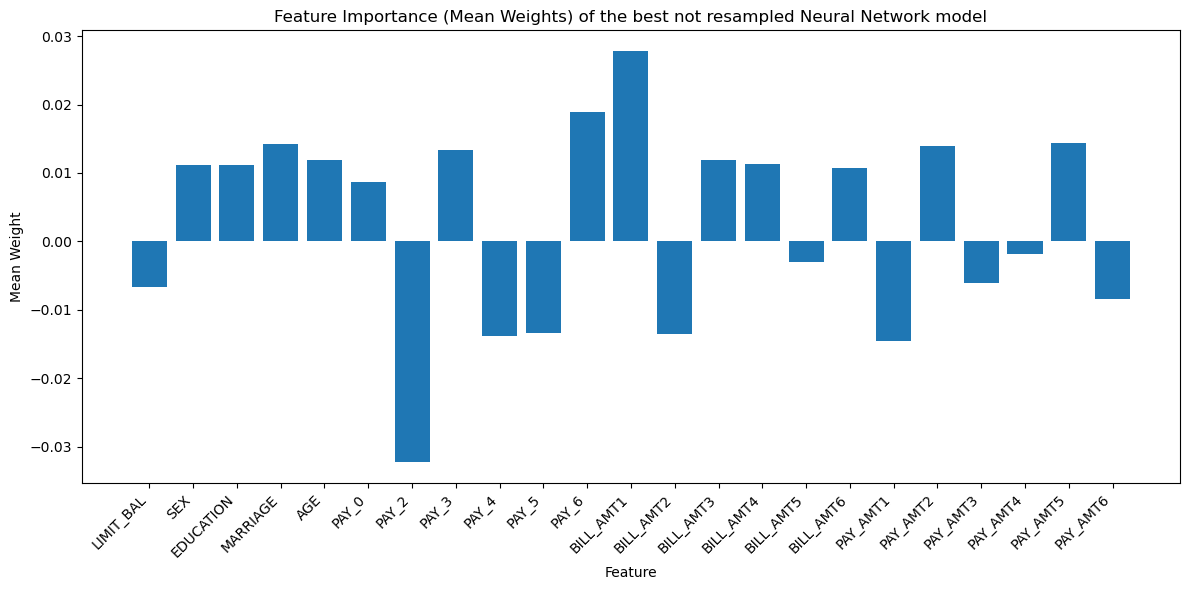

In [20]:
import matplotlib.pyplot as plt
feature_importance = best_model.coefs_[0]
# Get the mean weights across neurons for each feature
mean_feature_importance = feature_importance.mean(axis=1)

# Get the column names of the input data (assuming input_cols is a DataFrame)
feature_names = input_cols.columns

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, mean_feature_importance)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Mean Weight') ## MEAN WEIGTHS --> OMDAT JE HET GEMIDDELDE PAKT OVER DE 100 NEURONS IN DE EERSTE LAAG!
plt.title('Feature Importance (Mean Weights) of the best not resampled Neural Network model')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


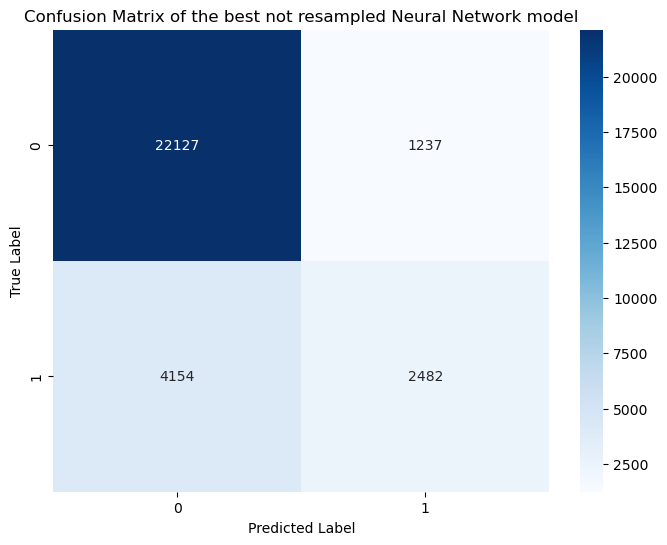

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best not resampled Neural Network model")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col, predicted_labels)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")

In [12]:
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Assuming input_cols and target_col are pandas DataFrames or Series

# Configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Define the model
model = MLPClassifier(random_state=42, max_iter=1000)  # Example: Increase max_iter to 1000

# Define search space
space = dict()
space['activation'] = ['relu']
space['solver'] = ['sgd']
space['batch_size'] = [16]  # Options for batch size
space['learning_rate'] = ['adaptive']  # Options for learning rate
space['momentum'] = [0.5]  # Options for momentum

# Lists to store results
train_reports = []
validation_reports = []
test_reports = []

# Execute the nested cross-validation
for train_ix, test_ix in cv_outer.split(input_cols):
    X_train, X_test = input_cols.iloc[train_ix], input_cols.iloc[test_ix]
    y_train, y_test = target_col.iloc[train_ix], target_col.iloc[test_ix]

    # Define search
    search = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner, refit=True)
    
    # Fit the grid search
    search.fit(X_train, y_train)
    
    # Best model
    best_model = search.best_estimator_
    
    # Get the training predictions and generate report
    train_pred = best_model.predict(X_train)
    train_report = classification_report(y_train, train_pred, digits=4)
    train_reports.append(train_report)
    
    # Get the validation predictions and generate report
    val_pred = cross_val_predict(best_model, X_train, y_train, cv=cv_inner, n_jobs=-1)
    val_report = classification_report(y_train, val_pred, digits=4)
    validation_reports.append(val_report)
    
    # Get the test predictions and generate report
    test_pred = best_model.predict(X_test)
    test_report = classification_report(y_test, test_pred, digits=4)
    test_reports.append(test_report)

# Print the results for each fold
for i in range(len(train_reports)):
    print(f"Fold {i+1} Training Classification Report:\n{train_reports[i]}")
    print(f"Fold {i+1} Validation Classification Report:\n{validation_reports[i]}")
    print(f"Fold {i+1} Test Classification Report:\n{test_reports[i]}")
    print("-" * 60)

# Optionally, average the classification reports or print a summary
# (This part is complex as it involves aggregating classification reports, which typically
# means aggregating precision, recall, f1-score, and support for each class across folds)



Fold 1 Training Classification Report:
              precision    recall  f1-score   support

           0     0.8432    0.9486    0.8928     21040
           1     0.6753    0.3772    0.4840      5960

    accuracy                         0.8225     27000
   macro avg     0.7592    0.6629    0.6884     27000
weighted avg     0.8061    0.8225    0.8026     27000

Fold 1 Validation Classification Report:
              precision    recall  f1-score   support

           0     0.8422    0.9463    0.8913     21040
           1     0.6639    0.3742    0.4786      5960

    accuracy                         0.8200     27000
   macro avg     0.7531    0.6603    0.6849     27000
weighted avg     0.8029    0.8200    0.8002     27000

Fold 1 Test Classification Report:
              precision    recall  f1-score   support

           0     0.8430    0.9471    0.8920      2324
           1     0.6838    0.3935    0.4995       676

    accuracy                         0.8223      3000
   macro avg 